In [459]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [460]:
default = pd.read_excel("/Users/happyfamily/Downloads/CompData-1.xlsx")

In [461]:
default.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [462]:
default.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,0.00,6490000000.00,0.48,0.00,0.18,0.32,0.19,0.02,...,0.32,0.00,0,0.00,0.62,0.03,0.57,1,0.17,0
2054,21216,Firstobj.Tech.,0.00,0.00,0.47,0.00,0.00,0.32,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.02,0.57,1,0.05,0
2055,142,Diamines & Chem.,0.00,8370000000.00,0.48,0.00,0.00,0.33,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.05,0
2056,18014,IL&FS Engg.,3750000000.00,0.00,0.47,0.00,0.31,0.32,0.17,0.02,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.06,0
2057,43229,Channel Nine,0.00,0.00,0.47,0.00,0.00,0.33,0.18,0.02,...,0.32,0.03,0,0.00,0.62,0.03,0.57,1,0.02,0


In [463]:
print('The number of rows (observations) is',default.shape[0],'\n''The number of columns (variables) is',default.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [464]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [465]:
default.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,1891.00,2058.00,2058.00,2058.00,...,2058.00,2044.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,17572.11,2052388835.76,1208634256.56,0.47,11130223.52,0.11,0.32,0.18,0.02,0.85,...,0.31,0.04,0.00,27793974.74,0.62,0.03,0.57,1.00,0.04,0.11
std,21892.89,3252623690.29,2144568158.08,0.02,90425949.04,0.15,0.02,0.03,0.02,0.00,...,0.01,0.05,0.06,471771444.55,0.01,0.01,0.01,0.00,0.06,0.31
min,4.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.74,...,0.00,0.00,0.00,0.00,0.41,0.01,0.17,1.00,0.00,0.00
25%,3674.00,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,...,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1.00,0.02,0.00
50%,6240.00,0.00,0.00,0.46,0.00,0.04,0.32,0.18,0.02,0.85,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1.00,0.03,0.00
75%,24280.75,4110000000.00,1550000000.00,0.47,0.00,0.22,0.33,0.19,0.02,0.85,...,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1.00,0.04,0.00
max,72493.00,9980000000.00,9980000000.00,1.00,990000000.00,1.00,0.46,0.79,1.00,1.00,...,0.57,1.00,1.00,9820000000.00,0.96,0.46,0.67,1.00,1.00,1.00


From Describe command it is observed that there are number of columns which has constant values.

In [466]:
pd.options.display.float_format = '{:.2f}'.format
default.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,1891.00,2058.00,2058.00,2058.00,...,2058.00,2044.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,17572.11,2052388835.76,1208634256.56,0.47,11130223.52,0.11,0.32,0.18,0.02,0.85,...,0.31,0.04,0.00,27793974.74,0.62,0.03,0.57,1.00,0.04,0.11
std,21892.89,3252623690.29,2144568158.08,0.02,90425949.04,0.15,0.02,0.03,0.02,0.00,...,0.01,0.05,0.06,471771444.55,0.01,0.01,0.01,0.00,0.06,0.31
min,4.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.74,...,0.00,0.00,0.00,0.00,0.41,0.01,0.17,1.00,0.00,0.00
25%,3674.00,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,...,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1.00,0.02,0.00
50%,6240.00,0.00,0.00,0.46,0.00,0.04,0.32,0.18,0.02,0.85,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1.00,0.03,0.00
75%,24280.75,4110000000.00,1550000000.00,0.47,0.00,0.22,0.33,0.19,0.02,0.85,...,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1.00,0.04,0.00
max,72493.00,9980000000.00,9980000000.00,1.00,990000000.00,1.00,0.46,0.79,1.00,1.00,...,0.57,1.00,1.00,9820000000.00,0.96,0.46,0.67,1.00,1.00,1.00


In [467]:
#From this function it looks like many of the columns are having constant values in 25%,50%,75%

In [468]:
#Replace the or clean up the column names which has special characters or space etc....
default.columns = default.columns.str.replace(' ', '_').str.replace('  ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [469]:
#After Fixing messy columns

In [470]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [471]:
#Checking for the variable default

In [472]:
default['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [473]:
#Checking for the proportion of default

In [474]:
default['Default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: Default, dtype: float64

In [475]:
#Checking for the Missing Values

In [476]:
default.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [477]:
default.size

119364

In [478]:
default.isnull().sum().sum()

298

In [479]:
298/119364

0.00249656512851446

In [480]:
#There are 2% of missing values present in the dataset

In [481]:
#Split the data set to identify the outliers present in the independent records

In [482]:
default_X = default.drop('Default', axis = 1)
default_Y = default['Default']

In [483]:
default_X

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.58,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.55,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.46,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.58,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.59,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2743,Kothari Ferment.,0.00,6490000000.00,0.48,0.00,0.18,0.32,0.19,0.02,...,0.60,0.32,0.00,0,0.00,0.62,0.03,0.57,1,0.17
2054,21216,Firstobj.Tech.,0.00,0.00,0.47,0.00,0.00,0.32,0.17,0.02,...,0.58,0.31,0.03,0,0.00,0.62,0.02,0.57,1,0.05
2055,142,Diamines & Chem.,0.00,8370000000.00,0.48,0.00,0.00,0.33,0.16,0.02,...,0.65,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.05
2056,18014,IL&FS Engg.,3750000000.00,0.00,0.47,0.00,0.31,0.32,0.17,0.02,...,0.61,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.06


PART A: Outlier Treatment

In [484]:
#Checking for the number of outliers

In [485]:
Q1 = default_X.quantile(0.25)
Q3 = default_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [486]:
#Adding the Upper and Lower outliers present in each columns

In [487]:
((default_X > UL) | (default_X < LL)).sum()

Co_Code                                              241
Co_Name                                                0
_Accounts_Receivable_Turnover                        281
_Allocation_rate_per_person                          200
_Average_Collection_Days                              77
_CFO_to_Assets                                       110
_Cash_Flow_Per_Share                                 146
_Cash_Flow_to_Equity                                 306
_Cash_Flow_to_Liability                              407
_Cash_Flow_to_Total_Assets                           317
_Cash_Reinvestment_perc                              220
_Cash_Turnover_Rate                                    0
_Cash_flow_rate                                      206
_Cash_to_Current_Liability                           253
_Cash_to_Total_Assets                                163
_Continuous_Net_Profit_Growth_Rate                   340
_Current_Asset_Turnover_Rate                         464
_Current_Liability_to_Current_A

In [488]:
#Outliers Present in the data set
((default_X > UL) | (default_X < LL)).sum().sum()

11105

In [489]:
#Converting the outliers to Null values

In [490]:
default_X[((default_X > UL) | (default_X < LL))]= np.nan

In [491]:
default_X.isnull().sum()

Co_Code                                              241
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 313
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                   

In [492]:
default_X.isnull().sum().sum()#Total added values of Null and outliers

11403

In [493]:
#Removing the Columns which has constant values in the dataset

In [494]:
default_X = default_X.drop(['Co_Code', 'Co_Name', '_Liability_Assets_Flag','_Net_Income_Flag','_Interest_bearing_debt_interest_rate','_Realized_Sales_Gross_Profit_Growth_Rate','_No_credit_Interval'], axis = 1)

In [495]:
#After removing the columns which has constant values in the dataset
default_X.shape

(2058, 50)

In [496]:
default_sub1 = pd.concat([default_X, default_Y], axis =1 )

In [497]:
#Checking for total missing value for each row

In [498]:
default_sub1.isnull().sum(axis = 1)

0        4
1        8
2        1
3        5
4        1
        ..
2053    10
2054     4
2055     6
2056     0
2057     4
Length: 2058, dtype: int64

In [499]:
#Total missing values in terms of rows
default_sub1.isnull().sum(axis = 1).sum()

10382

In [500]:
#Filtering the data which is 90% or more records at the row level

In [501]:
default_sub1_temp = default_sub1[default_sub1.isnull().sum(axis = 1) <= 5]

In [502]:
default_sub1_temp.shape

(1262, 51)

In [503]:
default_sub1_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 2057
Data columns (total 51 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _Operating_Expense_Rate                            1262 non-null   float64
 1   _Research_and_development_expense_rate             1115 non-null   float64
 2   _Cash_flow_rate                                    1232 non-null   float64
 3   _Tax_rate_A                                        1237 non-null   float64
 4   _Cash_Flow_Per_Share                               1154 non-null   float64
 5   _Per_Share_Net_profit_before_tax_Yuan_             1233 non-null   float64
 6   _Operating_Profit_Growth_Rate                      1132 non-null   float64
 7   _Continuous_Net_Profit_Growth_Rate                 1117 non-null   float64
 8   _Total_Asset_Growth_Rate                           1262 non-null   float64
 9   _Net_Val

In [504]:
default_sub1_temp['Default'].value_counts()

0    1162
1     100
Name: Default, dtype: int64

In [505]:
default_sub1_temp['Default'].value_counts(normalize = True)

0   0.92
1   0.08
Name: Default, dtype: float64

In [506]:
#Initially we had more than 10% of defaulters now it has been reduced to just 7% where we are missing out on some of the dataset

In [507]:
default_sub1.isnull().sum().sort_values(ascending = False)/default_sub1.index.size
#From the below table it is clear that null values are below 30% for all the columns now.
#So there is no need to remove or delete any of the columns

_Fixed_Assets_Turnover_Frequency                    0.24
_Current_Asset_Turnover_Rate                        0.23
_Degree_of_Financial_Leverage_DFL                   0.21
_Cash_Flow_to_Liability                             0.20
_Interest_Coverage_Ratio_Interest_expense_to_EBIT   0.18
_Operating_profit_per_person                        0.17
_Continuous_Net_Profit_Growth_Rate                  0.17
_Interest_Expense_Ratio                             0.16
_Operating_Profit_Growth_Rate                       0.15
_Cash_Flow_to_Total_Assets                          0.15
_Cash_Flow_Per_Share                                0.15
_Cash_Flow_to_Equity                                0.15
_Net_Value_Growth_Rate                              0.15
_Accounts_Receivable_Turnover                       0.14
_Research_and_development_expense_rate              0.13
_Cash_to_Total_Assets                               0.13
_Cash_to_Current_Liability                          0.12
_Inventory_to_Working_Capital  

In [508]:
#Segerigate the Predictor and response

In [509]:
predictors = default_sub1.drop('Default', axis = 1)
response = default_sub1['Default']

In [510]:
#Scale the predictors

In [511]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [512]:
default_sub2 = pd.concat([scaled_predictors, response], axis = 1)

In [513]:
default_sub2.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to_Total_Assets',
       '_Cash_to_Total_Assets', '_Quick_Assets_to_Current_Liability',
       '_Cas

PART A: Missing Value Treatment

In [514]:
#Performing the Train and Test Split

In [515]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(default_sub2, test_size = 0.33, random_state=42)

In [516]:
#Treating the missing values

In [517]:
from sklearn.impute import KNNImputer

In [518]:
imputer = KNNImputer(n_neighbors=5)

In [519]:
default_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
default_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [520]:
print(default_imputed_train.isnull().sum().sum())
print(default_imputed_test.isnull().sum().sum())

0
0


PART A: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

In [659]:
#Checking for correlations between variables
#Here the correlations are being checked only for the Independent variables
#Variable which are significant to the models

<AxesSubplot:>

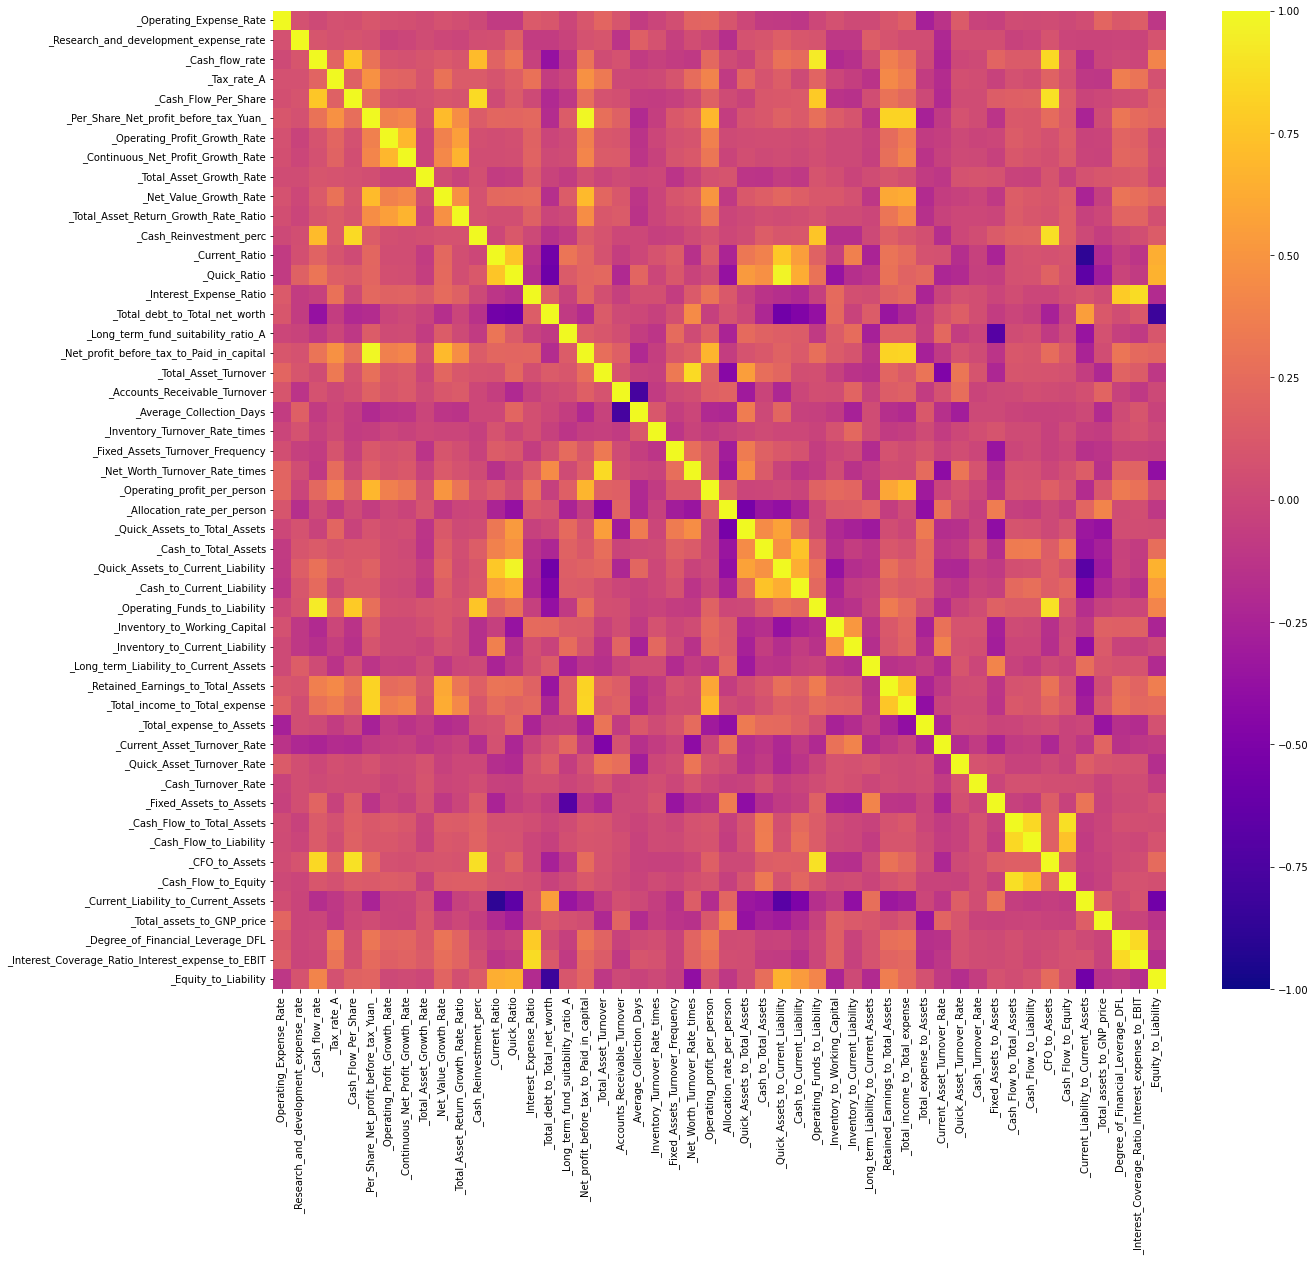

In [522]:
plt.figure(figsize = (20,18))
cor_matrix = default_imputed_train.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

Presence of correlation is clearly visible from the above plot

In [523]:
#Since there is a presence of correlation, Applying the VIF and sorting the columns which has VIF score of less than or equal to 5 

In [524]:
import statsmodels.formula.api as smf
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [525]:
#vif_cal(input_data=default_imputed_train.drop('Default',axis=1))
X = default_imputed_train.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,_Net_profit_before_tax_to_Paid_in_capital,45.65
5,_Per_Share_Net_profit_before_tax_Yuan_,44.58
28,_Quick_Assets_to_Current_Liability,34.25
13,_Quick_Ratio,23.34
30,_Operating_Funds_to_Liability,11.89
43,_CFO_to_Assets,11.28
12,_Current_Ratio,10.53
2,_Cash_flow_rate,9.75
41,_Cash_Flow_to_Total_Assets,7.58
18,_Total_Asset_Turnover,7.50


In [526]:
X = X.drop('_Net_profit_before_tax_to_Paid_in_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
27,_Quick_Assets_to_Current_Liability,34.24
13,_Quick_Ratio,23.34
29,_Operating_Funds_to_Liability,11.88
42,_CFO_to_Assets,11.28
12,_Current_Ratio,10.52
2,_Cash_flow_rate,9.74
40,_Cash_Flow_to_Total_Assets,7.58
17,_Total_Asset_Turnover,7.50
22,_Net_Worth_Turnover_Rate_times,6.86
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.38


In [527]:
X = X.drop('_Quick_Assets_to_Current_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
28,_Operating_Funds_to_Liability,11.87
41,_CFO_to_Assets,11.27
2,_Cash_flow_rate,9.74
12,_Current_Ratio,8.94
13,_Quick_Ratio,7.80
39,_Cash_Flow_to_Total_Assets,7.58
17,_Total_Asset_Turnover,7.36
22,_Net_Worth_Turnover_Rate_times,6.84
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.35
5,_Per_Share_Net_profit_before_tax_Yuan_,6.33


In [528]:
X = X.drop('_Total_Asset_Turnover', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
27,_Operating_Funds_to_Liability,11.83
40,_CFO_to_Assets,11.26
2,_Cash_flow_rate,9.71
12,_Current_Ratio,8.93
13,_Quick_Ratio,7.72
38,_Cash_Flow_to_Total_Assets,7.54
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.35
5,_Per_Share_Net_profit_before_tax_Yuan_,6.33
4,_Cash_Flow_Per_Share,5.79
11,_Cash_Reinvestment_perc,5.77


In [529]:
y = default_imputed_train['Default']

PART A: Train Test Split

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

Have performed the Logistic regression using scikit as well as stats model

In [660]:
from sklearn.feature_selection import RFE #Very important
from sklearn.linear_model import LogisticRegression

In [533]:
#Logistic Regression 

In [551]:
LogR = LogisticRegression()

In [552]:
LR_model = LogR.fit(X_train, y_train)

In [554]:
pred_train_lr = LR_model.predict(X_train)
pred_test_lr = LR_model.predict(X_test)

In [555]:
print(metrics.classification_report(y_train, pred_train_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       827
         1.0       0.73      0.55      0.63        96

    accuracy                           0.93       923
   macro avg       0.84      0.76      0.79       923
weighted avg       0.93      0.93      0.93       923



PART A: Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model

In [556]:
print(metrics.classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       398
         1.0       0.66      0.40      0.50        57

    accuracy                           0.90       455
   macro avg       0.79      0.69      0.72       455
weighted avg       0.89      0.90      0.89       455



We need to consider only the recall value here for both train and test split
It is very much clear that reacll value for both train and test split is very low
This could also be because of the distribution of data between train and test 
Hence we need to try to impliment the SMOTE technique.

In [560]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = .75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [561]:
selector_smote = selector.fit(X_res, y_res)

In [562]:
selector_smote.n_features_

14

In [563]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [564]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       827
         1.0       0.84      0.88      0.86       620

    accuracy                           0.88      1447
   macro avg       0.87      0.88      0.88      1447
weighted avg       0.88      0.88      0.88      1447



In [565]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       398
         1.0       0.51      0.72      0.60        57

    accuracy                           0.88       455
   macro avg       0.73      0.81      0.76       455
weighted avg       0.90      0.88      0.89       455



Hence after applying the smote techinique in the Logistic regression model we could clearly see that the recall value for train and test split has improved drastically.
This model can be termed as a better model considering the fact that the given data set has lots of missing values, outliers and correlation problems.

In [661]:
#Logistic Regression using stats model
#have used stats model only to obtain the Optimization 

In [662]:
import statsmodels.formula.api as SM

In [663]:
f_1 = 'Default ~ _Operating_Funds_to_Liability +_CFO_to_Assets+_Cash_flow_rate+_Current_Ratio+_Quick_Ratio+_Cash_Flow_to_Total_Assets+_Interest_Coverage_Ratio_Interest_expense_to_EBIT+_Per_Share_Net_profit_before_tax_Yuan_+_Cash_Flow_Per_Share+_Cash_Reinvestment_perc+_Current_Liability_to_Current_Assets+_Equity_to_Liability+_Quick_Assets_to_Total_Assets+_Interest_Expense_Ratio+_Total_income_to_Total_expense+_Cash_Flow_to_Equity+_Degree_of_Financial_Leverage_DFL+_Retained_Earnings_to_Total_Assets+_Total_debt_to_Total_net_worth+_Cash_to_Current_Liability+_Cash_Flow_to_Liability+_Inventory_to_Current_Liability+_Net_Worth_Turnover_Rate_times+_Cash_to_Total_Assets+_Fixed_Assets_to_Assets+_Average_Collection_Days+_Operating_profit_per_person+_Accounts_Receivable_Turnover+_Continuous_Net_Profit_Growth_Rate+_Net_Value_Growth_Rate+_Long_term_fund_suitability_ratio_A+_Current_Asset_Turnover_Rate+_Allocation_rate_per_person+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_Profit_Growth_Rate+_Inventory_to_Working_Capital+_Total_expense_to_Assets+_Tax_rate_A+_Long_term_Liability_to_Current_Assets+_Total_assets_to_GNP_price+_Quick_Asset_Turnover_Rate+_Fixed_Assets_Turnover_Frequency+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Cash_Turnover_Rate'

In [664]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [665]:
model_1 = SM.logit(formula = f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.171847
         Iterations 10


In [666]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  923
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           47
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                  0.4852
Time:                        20:13:58   Log-Likelihood:                -158.61
converged:                       True   LL-Null:                       -308.10
Covariance Type:            nonrobust   LLR p-value:                 2.233e-38
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -4.5454      0.448    -10.154      0.000      -5.423      -3.668
_Operating_Funds_to_Liability                        -0.1188      0.686     -0.173      0.862      -1.464       1.226
_CFO_to_Assets                                       -0.9538      0.562     -1.698      0.089      -2.055       0.147
_Cash_flow_rate                                       0.2850      0.646      0.441      0.659      -0.981       1.551
_Current_Ratio                                        0.2200      0.712      0.309      0.757      -1.175       1.615
_Quick_Ratio                                         -2.3447      0.652     -3.599      0.000      -3.622      -1.068
_Cash_Flow_to_Total_Assets                            0.5330      0.524      1.016      0.309      -0.495       1.561
_Interest_Coverage_Ratio_Interest_expense_to_EBIT    -0.0260      0.306     -0.085      0.932      -0.626       0.574
_Per_Share_Net_profit_before_tax_Yuan_               -0.0491      0.402     -0.122      0.903      -0.837       0.739
_Cash_Flow_Per_Share                                  0.1753      0.363      0.483      0.629      -0.536       0.887
_Cash_Reinvestment_perc                               0.0841      0.332      0.254      0.800      -0.566       0.735
_Current_Liability_to_Current_Assets                  0.0257      0.335      0.076      0.939      -0.632       0.683
_Equity_to_Liability                                 -1.0002      0.582     -1.719      0.086      -2.141       0.140
_Quick_Assets_to_Total_Assets                         0.5929      0.432      1.372      0.170      -0.254       1.440
_Interest_Expense_Ratio                              -0.0724      0.289     -0.251      0.802      -0.639       0.494
_Total_income_to_Total_expense                       -0.7115      0.401     -1.775      0.076      -1.497       0.074
_Cash_Flow_to_Equity                                  0.2270      0.331      0.686      0.493      -0.422       0.876
_Degree_of_Financial_Leverage_DFL                     0.0014      0.263      0.005      0.996      -0.514       0.517
_Retained_Earnings_to_Total_Assets                    0.0638      0.312      0.204      0.838      -0.548       0.676
_Total_debt_to_Total_net_worth                        0.2929      0.289      1.014      0.310      -0.273       0.859
_Cash_to_Current_Liability                            0.9325      0.433      2.156      0.031       0.085       1.780
_Cash_Flow_to_Liability                              -1.0191      0.445     -2.290      0.022      -1.891      -0.147
_Inventory_to_Current_Liability                       0.1622      0.461      0.352      0.725      -0.741       1.066
_Net_Worth_Turnover_Rate_times                       -0.2810      0.263     -1.068      0.286      -0.797       0.235
_Cash_to_Total_Assets                                -0

PART A: Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [667]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [668]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [669]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 50}

In [670]:
best_grid = grid_search.best_estimator_

In [671]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [672]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       827
         1.0       0.88      0.46      0.60        96

    accuracy                           0.94       923
   macro avg       0.91      0.73      0.78       923
weighted avg       0.93      0.94      0.93       923



PART A: Validate the Random Forest Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [673]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       398
         1.0       0.67      0.28      0.40        57

    accuracy                           0.89       455
   macro avg       0.79      0.63      0.67       455
weighted avg       0.88      0.89      0.87       455



The recall value for test data set is very low compared to that of train data set, 
The RF model looks underfit. As been tried for Logistic regression model SMOTE technique can also be implemented
The data still consists of high Pvalues which also could be the cause of poor predicition by the model.

PART A: Build a LDA Model on Train Dataset. Also showcase your model building approach

In [674]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [675]:
LDA = LinearDiscriminantAnalysis()

In [676]:
lda_model = LDA.fit(X_train, y_train)

In [677]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [678]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       827
         1.0       0.61      0.53      0.57        96

    accuracy                           0.92       923
   macro avg       0.78      0.75      0.76       923
weighted avg       0.91      0.92      0.91       923



PART A: Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model

In [680]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       398
         1.0       0.57      0.47      0.52        57

    accuracy                           0.89       455
   macro avg       0.75      0.71      0.73       455
weighted avg       0.88      0.89      0.89       455



Compared to Random Forest model LinearDiscriminant model has performed well but still the Recall is not the best.

PART A: Conclusions and Recommendations

The data set is about predicting the customers who will be defaulter or not
Hence this can be considered as the classification model
since being an classification approach we need to check for data split as well if it unbalanced the model wont perform as per the expectation.
Hence have performed the SMOTE technique in one of the models.
The targeted column here is the Default and if we check for the proportion of default is 10% which is high in banking perspective. 
From our model perspective Linear Regression model has performed well after implementing the SMOTE techinique
compared to all other models.
Missing values Outlier and correlations were observed in the dataset which were treated but still the pvalues for some of the columns were observed to be high.
LinearDiscriment model has performed better when compared to RandomForest.